## Problem Metadata 
DO NOT DELETE. This is a JSON Block. The metadata and course context MUST be in the first cell. 

```json
{
    "problem_title": "refrigerationCycleFlashChamber",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["medium"],
    "topic": "Refrigeration",
    "lecture_reference": {
        "lecture_id": "",
        "subtopics": [
            {
                "key": "",
                "topic": ""
            },
            {
                "key": "",
                "topic": ""
            }
        ]
    },
    "book_reference": {
        "chapter_number": 11,
        "title": "Refrigeration Cycles",
        "sections": [
            "Innovative Vapor-Compression Refrigeration Systems"
        ]
    },
    "notes": "Example 11-5 from Cengel's 9th edition."
}

## 1. Problem Statement

Consider a two-stage compression refrigeration system operating between the pressure limits of 0.8 and 0.14 MPa. The working fluid is refrigerant-134a. The refrigerant leaves the condenser as a saturated liquid and is throttled to a flash chamber operating at 0.32 MPa. Part of the refrigerant evaporates during this flashing process, and this vapor is mixed with the refrigerant leaving the low-pressure compressor. The mixture is then compressed to the condenser pressure by the high-pressure compressor. The liquid in the flash chamber is throttled to the evaporator pressure and cools the refrigerated space as it vaporizes in the evaporator. Assume the refrigerant leaves the evaporator as a saturated vapor and both compressors are isentropic.

**Goal:** Determine:
* (a) the fraction of the refrigerant that evaporates as it is throttled to the flash chamber,
* (b) the amount of heat removed from the refrigerated space and the compressor work per unit mass of refrigerant flowing through the condenser, and
* (c) the coefficient of performance.

## 2. Schematic 
```
                   Heat out
                      ^
                      |
                +-----------+
    +---(5)-----| Condenser |<--(4)----+  
    |           +-----------+          |
    v                             +----------+
+----------+                      |Compressor|<----- Work in
| Expansion|                      +----------+
| Valve    |                           ^
+----------+                           |
    |                                 (9)    
   (6)                                 |
    |                                  |
    v                                  |
+----------+                      +----------+
|  Flash   |--------(3)---------->|  Chamber |
| Chamber  |                      +----------+
+----------+                           ^
    |                                  |
   (7)                                 |
    |                                  |
    v                                 (2)
+----------+                           |
| Expansion|                      +----------+
| Valve    |                      |Compressor|<----- Work in
+----------+                      +----------+
    |                                  ^
    |                                  |
    |                                  |
    |           +-----------+          | 
    +---(8)---->| Evaporator|----(1)---+ 
                +-----------+
                     ^
                     |
                  Heat in
```

## 3. Assumptions and Approximations
### A. General (Cycle-Wide) Assumptions
1.  **Steady-State/Steady-Flow:** For each device in the cycle ($\Delta m_\text{CV}= 0$, $\Delta E_\text{CV}= 0$, $\Delta S_\text{CV}= 0$).
2.  **Overall Energy:** All changes in **Kinetic Energy ($\Delta KE$) and Potential Energy ($\Delta PE$)** are negligible between components, except where explicitly calculated (e.g., for a nozzle or diffuser).
3.  ***Property Model and Analysis Method:*** 
    * **Property tables: `pyCalor` (Accurate):**
        * **Purpose:** Must be used for determining water properties. 
        * **Tools:** Properties ($h$, $s$, $T$, and $p$) are retrieved directly from a **thermodynamic property library** (e.g., **`pyCalor`**). Since it is a pure substance we only need to know two independent properties.

---

### B. Component-Specific Assumptions

1.  **Conservation of Mass:** For all devices operating at steady-flow, the mass entering is equal to the mass exiting: **$\dot{m}_{\text{in}} = \dot{m}_{\text{out}}$**).
2.  **Conservation of Energy (First Law):** The **Steady-Flow Energy Equation** is applied to determine work and heat transfer.
3.  **Entropy Balance (Second Law):** The **Entropy Balance for a Control Volume Equation** is applied to determine changes in entropy.

#### 1-2. Compressor
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_C$)**.

#### 2,3-9. Mixing Chamber
* **Adiabatic:** $\dot{Q}=0$.
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

#### 9-4. Compressor
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_C$)**.

#### 4-5. Condenser
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.
* **Saturated Liquid** at the exit state.

#### 5-6. Expansion Valve
* **Adiabatic:** $\dot{Q}=0$.
* **No Shaft Work:** $\dot{W}=0$.

#### 6-3,7. Flash Chamber
* **Adiabatic:** $\dot{Q}=0$.
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

#### 7-8. Expansion Valve
* **Adiabatic:** $\dot{Q}=0$.
* **No Shaft Work:** $\dot{W}=0$.

#### 8-1. Evaporator
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

## 4. Physical Laws
### Control Volumes:
1.  **First Law of Thermodynamics (Energy Balance for Control Volume):**
    $$\frac{dE_\text{CV}}{dt} = \dot{E}_\text{in} - \dot{E}_\text{out}$$

2.  **Conservation of Mass (Mass Balance for a Control Volume):**
    $$\frac{dm_\text{CV}}{dt} = \dot{m}_\text{in} - \dot{m}_\text{out}$$
    
3.  **Entropy Balance (Second Law for a Control Volume):**
    $$\frac{dS_\text{CV}}{dt} = \dot{S}_\text{in} - \dot{S}_\text{out} + \dot{S}_\text{gen}$$

### Steady-Flow Analysis
Since each devices operates as a **Steady-Flow** device we can write: 

**Mass Balance:**
$$\dot{m}_\text{in} = \dot{m}_\text{out} = \dot{m}$$

**Energy Balance:**
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} + \frac{w_\text{in}^2}{2} + g z_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} + \frac{w_\text{out}^2}{2} + g z_\text{out} \right)$$

Neglecting kinetic and potential energy effects:
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} \right)$$

**Entropy Balance:**
$$\dot{S}_\text{gen} = \dot{S}_\text{out} - \dot{S}_\text{in}$$

Assuming that the process is adiabatic and reversible (isentropic), we have:
$$\dot{S}_\text{out} = \dot{S}_\text{in}$$

and

$$\dot{m}_\text{out}s_\text{out} = \dot{m}_\text{in}s_\text{in}$$

Therefore,

$$s_\text{in} = s_\text{out}$$

### Device Governing Equations (First Law)
We can write our steady-flow energy equation for each device by applying the appropriate **Assumptions and Approximations** listed above.

For the compressor (1-2):
$$\dot{W}_\text{in} =  \dot{m} \left(h_\text{2a} - h_1\right)$$

For the mixing chamber (2,3-9):
$$y \dot{m} h_2 + (1-y)\dot{m}h_3 = \dot{m}h_9 $$

For the compressor (9-4):
$$\dot{W}_\text{in} = \dot{m} \left(h_\text{4a} - h_9\right)$$

For the condenser (4-5):
$$\dot{Q}_\text{out} = \dot{m} \left(h_\text{4a} - h_5\right)$$

For the expansion valve (5-6):
$$h_6 = h_5$$

For the flash chamber (6-3,7):
$$\dot{m} h_6 = y\dot{m}h_7 + (1-y)\dot{m}h_3$$

For the expansion valve (7-8):
$$h_8 = h_7$$

For the evaporator (8-1):
$$\dot{Q}_\text{in} = y \dot{m} \left(h_1 - h_8\right)$$

### Isentropic Efficiency (Linking Actual and Ideal States)

The isentropic efficiency definition for a compressor is used to determine the actual exit enthalpies ($h_{2a}$, $h_{4a}$):

**Compressor Isentropic Efficiency:**
$$\eta_\text{C} = \frac{\text{Isentropic compressor work}}{\text{Actual compressor work}} = \frac{h_{2s} - h_1}{h_{2a} - h_1} $$

$$\eta_\text{C} = \frac{\text{Isentropic compressor work}}{\text{Actual compressor work}} = \frac{h_{4s} - h_9}{h_{4a} - h_9} $$

### Coefficient of Performance of a Refrigeration System

What we want is to cool a refrigerated space. The rate of cooling is $\dot{Q}_\text{in}$. What we need to input in order to achieve this is work, $\dot{W}_\text{in}$. Therefore:

$$\text{COP}_\text{R} = \frac{\dot{Q}_\text{in}}{\dot{W}_\text{in}} = \frac{y(h_1 - h_8)}{y(h_\text{2a} - h_1) + (h_\text{4a} - h_9)} $$

0.795077503690116


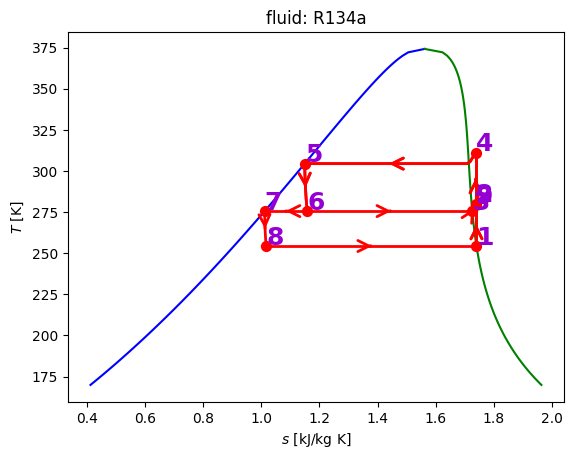

In [26]:
# 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th

substance = 'R134a'

pHigh_MPa = 0.8
pFlash_MPa = 0.32
pLow_MPa = 0.14

# state 5
x5 = 0
p5_MPa = pHigh_MPa
st5 = th.state(substance,x=x5,p=(p5_MPa,'Mpa'),name='5')

# state 6
h6 = st5.h
p6_MPa = pFlash_MPa
st6 = th.state(substance,h=(h6,'kJ/kg'),p=(p6_MPa,'Mpa'),name='6')

# state 3
x3 = 1
p3_MPa = st6.p/1000
st3 = th.state(substance,x=x3,p=(p3_MPa,'Mpa'),name='3')

# state 7
x7 = 0
p7_MPa = p6_MPa
st7 = th.state(substance,x=x7,p=(p7_MPa,'Mpa'),name='7')

# state 8
p8_MPa = pLow_MPa
h8 = st7.h
st8 = th.state(substance,h=(h8,'kJ/kg'),p=(p8_MPa,'Mpa'),name='8')

# state 1
x1 = 1
p1_MPa = pLow_MPa
st1 = th.state(substance,x=x1,p=(p1_MPa,'Mpa'),name='1')

# state 2
s2 = st1.s
p2_MPa = pFlash_MPa
st2 = th.state(substance,s=(s2,'kJ/kg K'),p=(p2_MPa,'Mpa'),name='2')

# Flash chamber analysis
# y = (h_6 - h_3)/(h_7-h_3) 
y = (st6.h - st3.h)/(st7.h - st3.h); print(y)

# state 9
# h_9 = (1-y) h_3 + y h_2
h9 = (1-y)*st3.h + y*st2.h
p9_MPa = pFlash_MPa
st9 = th.state(substance,h=(h9,'kJ/kg'),p=(p9_MPa,'Mpa'),name='9')

# state 4
s4 = st9.s
p4_MPa = pHigh_MPa
st4 = th.state(substance,s=(s4,'kJ/kg K'),p=(p4_MPa,'Mpa'),name='4')

(a) The fraction of the refrigerant that evaporates as it is throttled to the flash chamber, x6 = 0.2049
(b) q_in = 146.28 kJ/kg
(b) w_in = 32.69 kJ/kg
(c) COP_R = 4.48


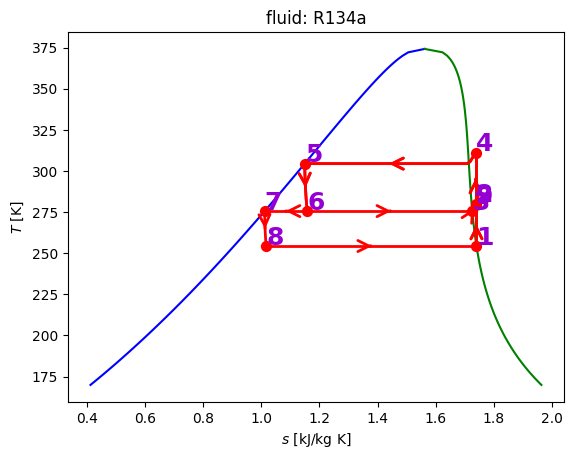

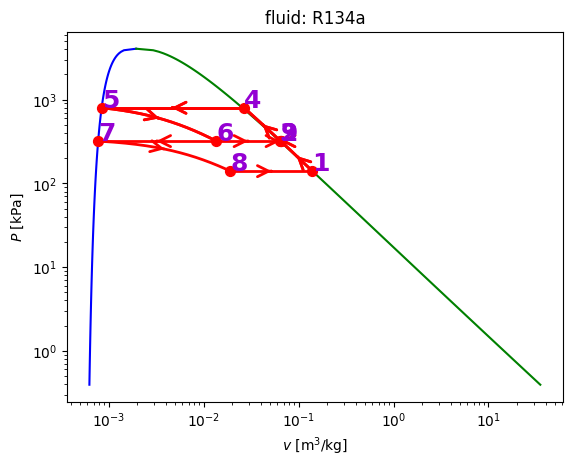

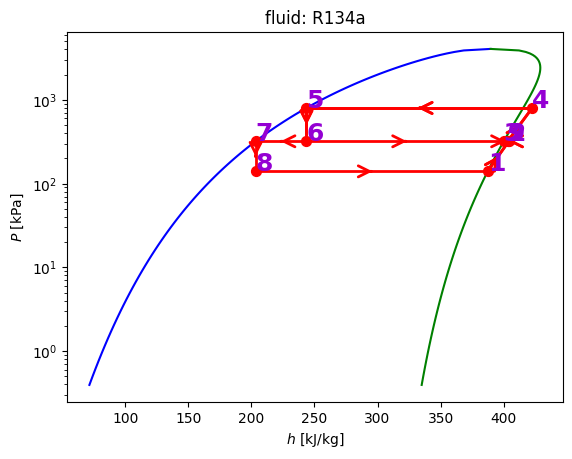

In [35]:
# 6 Calculations (Code Cell)
print(f"(a) The fraction of the refrigerant that evaporates as it is throttled to the flash chamber, x6 = {st6.x:.4f}")

qIn_kJperKg = y*(st1.h - st8.h)
wIn_kJperKg = y * (st2.h - st1.h) + (st4.h - st9.h)
print(f"(b) q_in = {qIn_kJperKg:.2f} kJ/kg")
print(f"(b) w_in = {wIn_kJperKg:.2f} kJ/kg")

COP = qIn_kJperKg/wIn_kJperKg
print(f"(c) COP_R = {COP:.2f}")

pr = th.process([(st1,st2),(st2,st9),(st9,st4),(st4,st5),(st5,st6),(st6,st7),(st7,st8),(st8,st1),(st1,st2),(st2,st9),(st9,st4),(st4,st5),(st5,st6),(st6,st3),(st3,st9)])
fig1 = pr.plot('Ts');
fig2 = pr.plot('pv');
fig3 = pr.plot('ph');

#fig1.savefig("figure_1.pdf")
#fig2.savefig("figure_2.pdf")
#fig3.savefig("figure_3.pdf")

## 7. Summary and Reasoning
* **Key Insight:** We can increase the COP for a refrigeration system by going from a single stage compression to a two-stage compression. 

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---